In [1084]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [1085]:
df = pd.read_csv('dataframe_20k_290623.csv').drop(columns=['Unnamed: 0'])

In [1086]:
df.head()

,locality,type of property,subtype of property,price,number_rooms,living_area,kitchen,furnished,fireplace,terrace,terrace_area,garden,garden_area,surface_land,number_facades,swimming_pool,building_state
0,Ham,HOUSE,VILLA,429500.0,4.0,215.0,INSTALLED,NaN,-1.0,NaN,NaN,True,NaN,1472,4,NaN,GOOD
1,Putte,HOUSE,HOUSE,599000.0,5.0,167.0,INSTALLED,NaN,-1.0,True,NaN,True,95.0,416,4,NaN,JUST_RENOVATED
2,IVOZ-RAMET,HOUSE,HOUSE,20000.0,3.0,130.0,INSTALLED,NaN,-1.0,True,NaN,NaN,NaN,182,3,NaN,GOOD
3,Herstal,HOUSE,HOUSE,45000.0,2.0,120.0,USA_INSTALLED,True,NaN,True,12.0,True,80.0,221,2,False,TO_BE_DONE_UP
4,Liege,HOUSE,HOUSE,109000.0,2.0,62.0,SEMI_EQUIPPED,False,NaN,NaN,NaN,NaN,NaN,45,2,False,TO_BE_DONE_UP


In [1087]:
df.rename(columns = {'type of property':'property_type', 'subtype of property':'property_subtype'}, inplace = True)
df.head()

,locality,property_type,property_subtype,price,number_rooms,living_area,kitchen,furnished,fireplace,terrace,terrace_area,garden,garden_area,surface_land,number_facades,swimming_pool,building_state
0,Ham,HOUSE,VILLA,429500.0,4.0,215.0,INSTALLED,NaN,-1.0,NaN,NaN,True,NaN,1472,4,NaN,GOOD
1,Putte,HOUSE,HOUSE,599000.0,5.0,167.0,INSTALLED,NaN,-1.0,True,NaN,True,95.0,416,4,NaN,JUST_RENOVATED
2,IVOZ-RAMET,HOUSE,HOUSE,20000.0,3.0,130.0,INSTALLED,NaN,-1.0,True,NaN,NaN,NaN,182,3,NaN,GOOD
3,Herstal,HOUSE,HOUSE,45000.0,2.0,120.0,USA_INSTALLED,True,NaN,True,12.0,True,80.0,221,2,False,TO_BE_DONE_UP
4,Liege,HOUSE,HOUSE,109000.0,2.0,62.0,SEMI_EQUIPPED,False,NaN,NaN,NaN,NaN,NaN,45,2,False,TO_BE_DONE_UP


In [1088]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19980 entries, 0 to 19979
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   locality          19974 non-null  object 
 1   property_type     19974 non-null  object 
 2   property_subtype  19974 non-null  object 
 3   price             19499 non-null  float64
 4   number_rooms      19499 non-null  float64
 5   living_area       18445 non-null  float64
 6   kitchen           18077 non-null  object 
 7   furnished         9815 non-null   object 
 8   fireplace         6176 non-null   float64
 9   terrace           12887 non-null  object 
 10  terrace_area      7391 non-null   float64
 11  garden            9078 non-null   object 
 12  garden_area       5916 non-null   float64
 13  surface_land      18209 non-null  object 
 14  number_facades    16438 non-null  object 
 15  swimming_pool     10256 non-null  object 
 16  building_state    16589 non-null  object

In [1089]:
df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19980 entries, 0 to 19979
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   locality          19974 non-null  object 
 1   property_type     19974 non-null  object 
 2   property_subtype  19974 non-null  object 
 3   price             19499 non-null  float64
 4   number_rooms      19499 non-null  float64
 5   living_area       18445 non-null  float64
 6   kitchen           18077 non-null  object 
 7   furnished         9815 non-null   object 
 8   fireplace         6176 non-null   float64
 9   terrace           12887 non-null  object 
 10  terrace_area      7391 non-null   float64
 11  garden            9078 non-null   object 
 12  garden_area       5916 non-null   float64
 13  surface_land      18209 non-null  object 
 14  number_facades    16438 non-null  object 
 15  swimming_pool     10256 non-null  object 
 16  building_state    16589 non-null  object

In [1090]:
def analyze_column(df, column_name):
    column = df[column_name]
    num_nan = column.isnull().sum()
    num_unique = column.nunique()
    unique_values = column.unique()
    percentage_nan = (num_nan / len(column)) * 100
    percentage_unique = (num_unique / len(column)) * 100
    print(f"Analysis for column '{column_name}':")
    print(f"Number of NaN values: {num_nan}")
    print(f"Number of unique values: {num_unique}")
    print(f"Percentage of NaN values: {percentage_nan:.2f}%")
    print(f"Percentage of unique values: {percentage_unique:.2f}%")
    print(f"Unique values: {unique_values}")

In [1091]:
def create_cat_plot(df,column, angle):
    sns.barplot(x=column, y="price", data=df)
    # Set labels and title
    plt.xlabel(f"{column}")
    plt.ylabel("Price (in euro)")
    plt.title(f"{column} vs. Price")
    plt.xticks(rotation=angle)
    # Show the plot
    plt.show()

In [1092]:
def create_num_plot(df, column):
    sns.lineplot(x=column, y='price', data=df)
    plt.xlabel(f"{column}")
    plt.ylabel("Price (in euro)")
    plt.title(f"{column} vs. Price")
    # Show the plot
    plt.show()

In [1093]:
df = df.dropna(how='all')

In [1094]:
df

,locality,property_type,property_subtype,price,number_rooms,living_area,kitchen,furnished,fireplace,terrace,terrace_area,garden,garden_area,surface_land,number_facades,swimming_pool,building_state
0,Ham,HOUSE,VILLA,429500.0,4.0,215.0,INSTALLED,NaN,-1.0,NaN,NaN,True,NaN,1472,4,NaN,GOOD
1,Putte,HOUSE,HOUSE,599000.0,5.0,167.0,INSTALLED,NaN,-1.0,True,NaN,True,95.0,416,4,NaN,JUST_RENOVATED
2,IVOZ-RAMET,HOUSE,HOUSE,20000.0,3.0,130.0,INSTALLED,NaN,-1.0,True,NaN,NaN,NaN,182,3,NaN,GOOD
3,Herstal,HOUSE,HOUSE,45000.0,2.0,120.0,USA_INSTALLED,True,NaN,True,12.0,True,80.0,221,2,False,TO_BE_DONE_UP
4,Liege,HOUSE,HOUSE,109000.0,2.0,62.0,SEMI_EQUIPPED,False,NaN,NaN,NaN,NaN,NaN,45,2,False,TO_BE_DONE_UP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19975,Brecht,HOUSE,HOUSE,375000.0,3.0,NaN,INSTALLED,False,NaN,NaN,NaN,True,245.0,712,4,False,GOOD
19976,Hasselt,APARTMENT,APARTMENT,1295000.0,3.0,191.0,0,NaN,NaN,NaN,NaN,NaN,NaN,UNKNOWN,NaN,NaN,GOOD
19977,Temse,HOUSE,HOUSE,549000.0,5.0,324.0,NaN,NaN,NaN,True,30.0,True,290.0,427,3,NaN,GOOD
19978,Affligem,HOUSE,HOUSE,485000.0,4.0,265.0,0,NaN,NaN,NaN,NaN,NaN,NaN,228,3,False,GOOD


### 0. PRICE

In [1095]:
# If we dont have a price - Delete the rows - not useable to predict pricing!

In [1096]:
# This will be what we will need to predict
df['price'].info()
df.price.info()

<class 'pandas.core.series.Series'>
Index: 19974 entries, 0 to 19979
Series name: price
Non-Null Count  Dtype  
--------------  -----  
19499 non-null  float64
dtypes: float64(1)
memory usage: 312.1 KB
<class 'pandas.core.series.Series'>
Index: 19974 entries, 0 to 19979
Series name: price
Non-Null Count  Dtype  
--------------  -----  
19499 non-null  float64
dtypes: float64(1)
memory usage: 312.1 KB


In [1097]:
# We have 475 rows with NaN as price - 2.38% of the total
analyze_column(df, 'price')

Analysis for column 'price':
Number of NaN values: 475
Number of unique values: 1624
Percentage of NaN values: 2.38%
Percentage of unique values: 8.13%
Unique values: [429500. 599000.  20000. ... 381500. 351000. 176000.]


In [1098]:
df[df['price'].isna()]
# Most values are not Filled in (NaN) so I decide to drop all of these 475 rows

,locality,property_type,property_subtype,price,number_rooms,living_area,kitchen,furnished,fireplace,terrace,terrace_area,garden,garden_area,surface_land,number_facades,swimming_pool,building_state
47,Roeselare,APARTMENT_GROUP,APARTMENT_GROUP,NaN,NaN,NaN,0,False,NaN,NaN,NaN,NaN,NaN,UNKNOWN,UNKNOWN,NaN,UNKNOWN
90,Evere,APARTMENT_GROUP,APARTMENT_GROUP,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,UNKNOWN,UNKNOWN,NaN,UNKNOWN
181,Balen,HOUSE_GROUP,HOUSE_GROUP,NaN,NaN,NaN,0,False,NaN,NaN,NaN,NaN,NaN,UNKNOWN,UNKNOWN,NaN,UNKNOWN
182,HERSELT,HOUSE_GROUP,HOUSE_GROUP,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,UNKNOWN,UNKNOWN,NaN,UNKNOWN
183,WITGOOR,HOUSE_GROUP,HOUSE_GROUP,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,UNKNOWN,UNKNOWN,NaN,UNKNOWN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18901,Mons,HOUSE_GROUP,HOUSE_GROUP,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,UNKNOWN,UNKNOWN,NaN,UNKNOWN
19186,Borgloon,HOUSE_GROUP,HOUSE_GROUP,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,UNKNOWN,UNKNOWN,NaN,UNKNOWN
19537,Borgloon,APARTMENT_GROUP,APARTMENT_GROUP,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,UNKNOWN,UNKNOWN,NaN,UNKNOWN
19718,Dessel,HOUSE_GROUP,HOUSE_GROUP,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,UNKNOWN,UNKNOWN,NaN,UNKNOWN


In [1099]:
df = df.dropna(subset=['price'])

In [1100]:
df[df['price'].isna()]
# ALL NaN Values are dropped

,locality,property_type,property_subtype,price,number_rooms,living_area,kitchen,furnished,fireplace,terrace,terrace_area,garden,garden_area,surface_land,number_facades,swimming_pool,building_state


In [1101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19499 entries, 0 to 19979
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   locality          19499 non-null  object 
 1   property_type     19499 non-null  object 
 2   property_subtype  19499 non-null  object 
 3   price             19499 non-null  float64
 4   number_rooms      19499 non-null  float64
 5   living_area       18445 non-null  float64
 6   kitchen           17602 non-null  object 
 7   furnished         9756 non-null   object 
 8   fireplace         6176 non-null   float64
 9   terrace           12887 non-null  object 
 10  terrace_area      7391 non-null   float64
 11  garden            9078 non-null   object 
 12  garden_area       5916 non-null   float64
 13  surface_land      17734 non-null  object 
 14  number_facades    15963 non-null  object 
 15  swimming_pool     10256 non-null  object 
 16  building_state    16114 non-null  object 
dty

In [1102]:
# Resetting index to have nice looking dataframe
df.reset_index(inplace=True, drop=True)

In [1103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19499 entries, 0 to 19498
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   locality          19499 non-null  object 
 1   property_type     19499 non-null  object 
 2   property_subtype  19499 non-null  object 
 3   price             19499 non-null  float64
 4   number_rooms      19499 non-null  float64
 5   living_area       18445 non-null  float64
 6   kitchen           17602 non-null  object 
 7   furnished         9756 non-null   object 
 8   fireplace         6176 non-null   float64
 9   terrace           12887 non-null  object 
 10  terrace_area      7391 non-null   float64
 11  garden            9078 non-null   object 
 12  garden_area       5916 non-null   float64
 13  surface_land      17734 non-null  object 
 14  number_facades    15963 non-null  object 
 15  swimming_pool     10256 non-null  object 
 16  building_state    16114 non-null  object

/tmp/ipykernel_35744/3862509857.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'] = pd.to_numeric(df['price'])


<Axes: xlabel='price', ylabel='Count'>

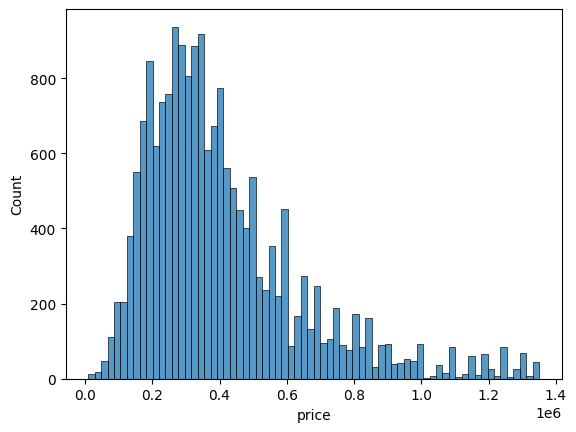

In [1104]:
df['price'] = pd.to_numeric(df['price'])
df_price_outlyers = df[df['price'] <= 1350000]
sns.histplot(df_price_outlyers, x='price')
# to have a normalized distribution we should take up to 1.350.000 euros

### 1. LOCALITY

In [1105]:
# LOOK TO MAKE THIS A GEO COORDINATION
analyze_column(df, 'locality')

Analysis for column 'locality':
Number of NaN values: 0
Number of unique values: 2589
Percentage of NaN values: 0.00%
Percentage of unique values: 13.28%
Unique values: ['Ham' 'Putte' 'IVOZ-RAMET' ... 'Louveigné' 'GrÃce-Hollogne' 'Schoonaarde']


In [1106]:
df['locality'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 19499 entries, 0 to 19498
Series name: locality
Non-Null Count  Dtype 
--------------  ----- 
19499 non-null  object
dtypes: object(1)
memory usage: 152.5+ KB


### 2. Property Type 

In [1107]:
analyze_column(df, 'property_type')

Analysis for column 'property_type':
Number of NaN values: 0
Number of unique values: 2
Percentage of NaN values: 0.00%
Percentage of unique values: 0.01%
Unique values: ['HOUSE' 'APARTMENT']


In [1108]:
# LOOKS OK, NO NAN Values
df['property_type'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 19499 entries, 0 to 19498
Series name: property_type
Non-Null Count  Dtype 
--------------  ----- 
19499 non-null  object
dtypes: object(1)
memory usage: 152.5+ KB


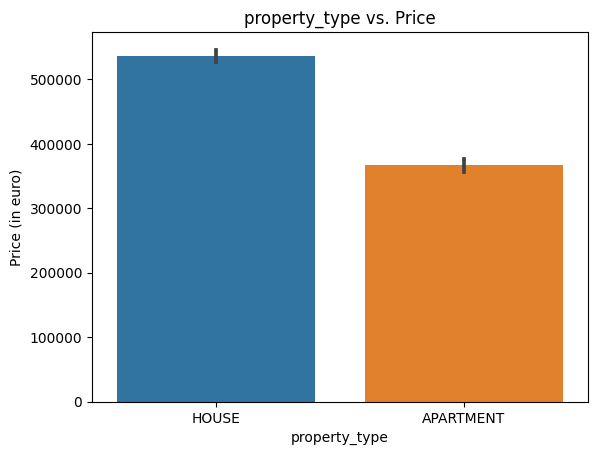

In [1109]:
create_cat_plot(df, 'property_type', 0)

### 3. Property Subtype

In [1110]:
analyze_column(df, 'property_subtype')

Analysis for column 'property_subtype':
Number of NaN values: 0
Number of unique values: 23
Percentage of NaN values: 0.00%
Percentage of unique values: 0.12%
Unique values: ['VILLA' 'HOUSE' 'APARTMENT_BLOCK' 'CHALET' 'COUNTRY_COTTAGE' 'APARTMENT'
 'FLAT_STUDIO' 'MIXED_USE_BUILDING' 'EXCEPTIONAL_PROPERTY' 'TOWN_HOUSE'
 'PENTHOUSE' 'DUPLEX' 'GROUND_FLOOR' 'MANSION' 'BUNGALOW' 'OTHER_PROPERTY'
 'CASTLE' 'SERVICE_FLAT' 'LOFT' 'KOT' 'TRIPLEX' 'FARMHOUSE' 'MANOR_HOUSE']


In [1111]:
df['property_subtype'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 19499 entries, 0 to 19498
Series name: property_subtype
Non-Null Count  Dtype 
--------------  ----- 
19499 non-null  object
dtypes: object(1)
memory usage: 152.5+ KB


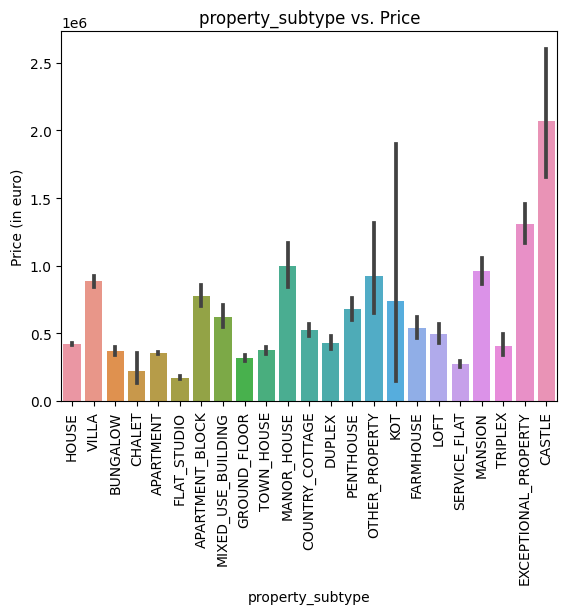

In [1112]:
df_sorted = df.sort_values(by='price', ascending=True)
create_cat_plot(df_sorted, 'property_subtype', 90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22],
 [Text(0, 0, 'VILLA'),
  Text(1, 0, 'HOUSE'),
  Text(2, 0, 'APARTMENT_BLOCK'),
  Text(3, 0, 'CHALET'),
  Text(4, 0, 'COUNTRY_COTTAGE'),
  Text(5, 0, 'APARTMENT'),
  Text(6, 0, 'FLAT_STUDIO'),
  Text(7, 0, 'MIXED_USE_BUILDING'),
  Text(8, 0, 'EXCEPTIONAL_PROPERTY'),
  Text(9, 0, 'TOWN_HOUSE'),
  Text(10, 0, 'PENTHOUSE'),
  Text(11, 0, 'DUPLEX'),
  Text(12, 0, 'GROUND_FLOOR'),
  Text(13, 0, 'MANSION'),
  Text(14, 0, 'BUNGALOW'),
  Text(15, 0, 'OTHER_PROPERTY'),
  Text(16, 0, 'CASTLE'),
  Text(17, 0, 'SERVICE_FLAT'),
  Text(18, 0, 'LOFT'),
  Text(19, 0, 'KOT'),
  Text(20, 0, 'TRIPLEX'),
  Text(21, 0, 'FARMHOUSE'),
  Text(22, 0, 'MANOR_HOUSE')])

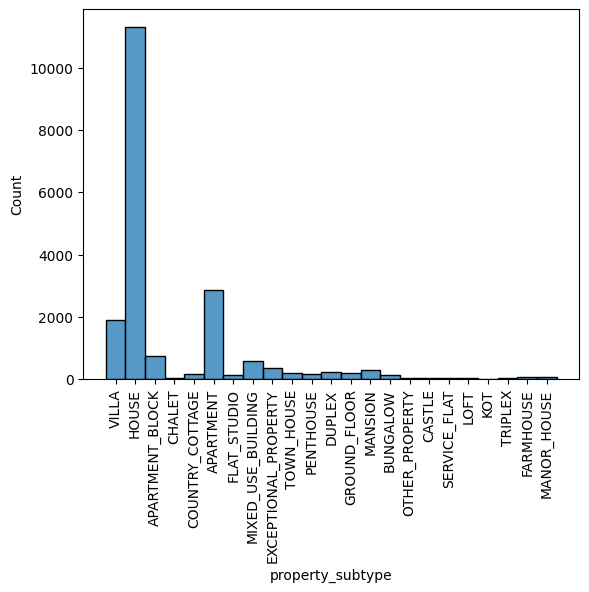

In [1113]:
sns.histplot(df, x='property_subtype')
plt.xticks(rotation=90)

### 4. Number of Rooms

In [1114]:
analyze_column(df, 'number_rooms')

Analysis for column 'number_rooms':
Number of NaN values: 0
Number of unique values: 29
Percentage of NaN values: 0.00%
Percentage of unique values: 0.15%
Unique values: [ 4.  5.  3.  2.  1.  0.  6.  7. 25. 17. 10. 12.  8.  9. 11. 27. 14. 21.
 13. 16. 30. 15. 18. 46. 24. 19. 22. 60. 20.]


In [1115]:
df['number_rooms'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 19499 entries, 0 to 19498
Series name: number_rooms
Non-Null Count  Dtype  
--------------  -----  
19499 non-null  float64
dtypes: float64(1)
memory usage: 152.5 KB


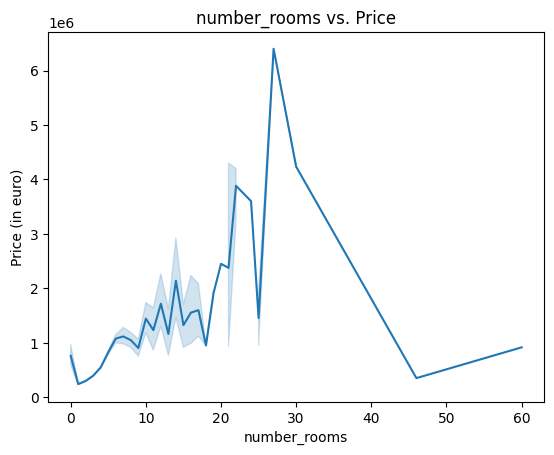

In [1116]:
create_num_plot(df, 'number_rooms')

<Axes: xlabel='number_rooms', ylabel='Count'>

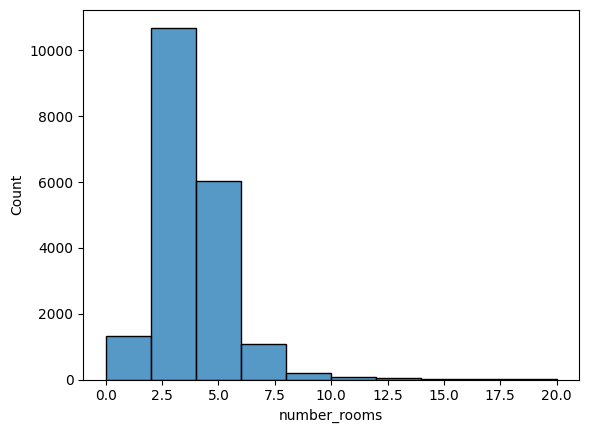

In [1117]:
df_num_rooms = df[df['number_rooms'] <= 20]

sns.histplot(df_num_rooms, x='number_rooms', bins = 10)
# Good metric would be to use num_rooms up to 20

### 5. Living Area

In [1118]:
analyze_column(df, 'living_area')

Analysis for column 'living_area':
Number of NaN values: 1054
Number of unique values: 725
Percentage of NaN values: 5.41%
Percentage of unique values: 3.72%
Unique values: [2.1500e+02 1.6700e+02 1.3000e+02 1.2000e+02 6.2000e+01 8.0000e+01
 1.7500e+02 9.0000e+01 4.4000e+01 1.4000e+02 1.0800e+02 6.6000e+01
 1.4600e+02 1.3500e+02 1.1000e+02 1.6400e+02 1.6800e+02 1.2500e+02
 2.1600e+02 1.6000e+02 1.0000e+02 8.1000e+01 1.8000e+02 1.8100e+02
 9.4000e+01 1.7100e+02 1.2200e+02 1.0400e+02 2.2900e+02 5.2600e+02
 1.0500e+02 9.5000e+01 2.5400e+02 1.6600e+02 3.7500e+02        nan
 2.2000e+02 1.4800e+02 8.5000e+01 9.9000e+01 2.4000e+02 3.6000e+01
 1.0600e+02 7.2000e+01 8.7000e+01 8.9000e+01 1.0300e+02 1.4500e+02
 2.5800e+02 2.5000e+02 3.2000e+02 2.5100e+02 2.1000e+02 2.8600e+02
 1.9000e+02 2.0000e+02 1.5500e+02 4.0500e+02 1.8800e+02 2.5300e+02
 2.7000e+02 7.6000e+01 1.0200e+02 2.2000e+01 3.9200e+02 1.3400e+02
 8.4000e+01 3.8800e+02 6.0000e+01 3.1100e+02 1.6100e+02 9.1000e+01
 5.7000e+01 1.8500e+02 

In [1119]:
analyze_column(df, 'living_area')

Analysis for column 'living_area':
Number of NaN values: 1054
Number of unique values: 725
Percentage of NaN values: 5.41%
Percentage of unique values: 3.72%
Unique values: [2.1500e+02 1.6700e+02 1.3000e+02 1.2000e+02 6.2000e+01 8.0000e+01
 1.7500e+02 9.0000e+01 4.4000e+01 1.4000e+02 1.0800e+02 6.6000e+01
 1.4600e+02 1.3500e+02 1.1000e+02 1.6400e+02 1.6800e+02 1.2500e+02
 2.1600e+02 1.6000e+02 1.0000e+02 8.1000e+01 1.8000e+02 1.8100e+02
 9.4000e+01 1.7100e+02 1.2200e+02 1.0400e+02 2.2900e+02 5.2600e+02
 1.0500e+02 9.5000e+01 2.5400e+02 1.6600e+02 3.7500e+02        nan
 2.2000e+02 1.4800e+02 8.5000e+01 9.9000e+01 2.4000e+02 3.6000e+01
 1.0600e+02 7.2000e+01 8.7000e+01 8.9000e+01 1.0300e+02 1.4500e+02
 2.5800e+02 2.5000e+02 3.2000e+02 2.5100e+02 2.1000e+02 2.8600e+02
 1.9000e+02 2.0000e+02 1.5500e+02 4.0500e+02 1.8800e+02 2.5300e+02
 2.7000e+02 7.6000e+01 1.0200e+02 2.2000e+01 3.9200e+02 1.3400e+02
 8.4000e+01 3.8800e+02 6.0000e+01 3.1100e+02 1.6100e+02 9.1000e+01
 5.7000e+01 1.8500e+02 

In [1120]:
# Theres quite a bit of Nan Values (5.41%)- checking these out 
#(we could backfill the NaN values with the mean of the Living_ area per property_subtype)
df[df['living_area'].isna()]

,locality,property_type,property_subtype,price,number_rooms,living_area,kitchen,furnished,fireplace,terrace,terrace_area,garden,garden_area,surface_land,number_facades,swimming_pool,building_state
43,Maldegem,HOUSE,HOUSE,270000.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,755,NaN,False,TO_RENOVATE
46,Lichtervelde,HOUSE,HOUSE,225000.0,4.0,NaN,0,False,NaN,True,NaN,True,NaN,190,NaN,False,TO_RENOVATE
55,Tisselt,APARTMENT,APARTMENT,185000.0,1.0,NaN,INSTALLED,False,NaN,True,26.0,True,NaN,NaN,2,False,GOOD
91,Brugge,APARTMENT,APARTMENT,273900.0,2.0,NaN,0,NaN,NaN,True,NaN,NaN,NaN,UNKNOWN,UNKNOWN,NaN,UNKNOWN
93,Wetteren,HOUSE,HOUSE,323500.0,4.0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,160,2,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19435,Grivegnée,APARTMENT,APARTMENT,145000.0,1.0,NaN,INSTALLED,NaN,-1.0,True,5.0,NaN,NaN,UNKNOWN,2,NaN,NaN
19438,Beyne-Heusay,HOUSE,EXCEPTIONAL_PROPERTY,745000.0,3.0,NaN,INSTALLED,False,NaN,True,17.0,True,174.0,10566,4,False,GOOD
19480,Waasmunster,HOUSE,HOUSE,549000.0,5.0,NaN,0,NaN,NaN,NaN,NaN,True,NaN,0,NaN,False,AS_NEW
19493,Molenbeek-Saint-Jean,HOUSE,EXCEPTIONAL_PROPERTY,369000.0,5.0,NaN,INSTALLED,False,NaN,NaN,NaN,NaN,NaN,0,2,False,GOOD


In [1121]:
# backfill the NaN values with the mean of the Living_area per property_subtype
mean_living_area = df.groupby('property_subtype')['living_area'].transform('mean')
#  Transform function is used to calculate the mean living area for each property subtype.
mean_living_area

0        289.694260
1        195.894535
2        195.894535
3        195.894535
4        195.894535
            ...    
19494    195.894535
19495     99.713227
19496    195.894535
19497    195.894535
19498     99.713227
Name: living_area, Length: 19499, dtype: float64

In [1122]:
mean_living_area = df.groupby('property_subtype')['living_area'].transform('mean')
filled_nan_living_area = df.groupby('property_subtype')['living_area'].fillna(mean_living_area)
df['living_area'] = filled_nan_living_area

/tmp/ipykernel_35744/613513142.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['living_area'] = filled_nan_living_area


In [1123]:
df[df['living_area'].isna()]

,locality,property_type,property_subtype,price,number_rooms,living_area,kitchen,furnished,fireplace,terrace,terrace_area,garden,garden_area,surface_land,number_facades,swimming_pool,building_state


<Axes: xlabel='living_area', ylabel='Count'>

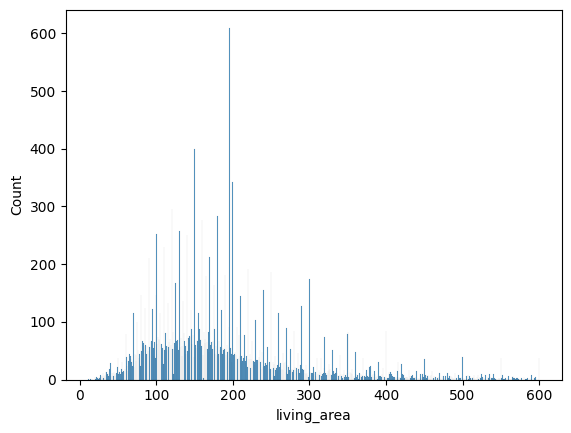

In [1124]:
df_living_area = df[df['living_area'] <= 600]
sns.histplot(df_living_area, x='living_area', bins=1000)

### 6. !!! Kitchen

In [1125]:
df['kitchen'].unique()

array(['INSTALLED', 'USA_INSTALLED', 'SEMI_EQUIPPED', 'NOT_INSTALLED',
       '0', nan, 'HYPER_EQUIPPED', 'USA_HYPER_EQUIPPED',
       'USA_SEMI_EQUIPPED', 'USA_UNINSTALLED'], dtype=object)

In [1126]:
df[df['kitchen'].isna()]
# TODO: We have a lot of NaN values - What to do with these?

,locality,property_type,property_subtype,price,number_rooms,living_area,kitchen,furnished,fireplace,terrace,terrace_area,garden,garden_area,surface_land,number_facades,swimming_pool,building_state
31,Evergem,HOUSE,HOUSE,425000.0,3.0,171.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,826,NaN,False,TO_RENOVATE
32,Brakel,HOUSE,HOUSE,145000.0,3.0,122.000000,NaN,NaN,NaN,NaN,NaN,True,NaN,868,NaN,False,TO_RENOVATE
35,Pentagone (Bruxelles),HOUSE,APARTMENT_BLOCK,1290000.0,5.0,526.000000,NaN,False,NaN,True,16.0,NaN,NaN,105,3,False,NaN
36,Ursel,APARTMENT,APARTMENT,279900.0,2.0,105.000000,NaN,False,NaN,NaN,NaN,NaN,NaN,UNKNOWN,2,False,GOOD
43,Maldegem,HOUSE,HOUSE,270000.0,4.0,195.894535,NaN,NaN,NaN,NaN,NaN,NaN,NaN,755,NaN,False,TO_RENOVATE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19483,Ruiselede,HOUSE,VILLA,645000.0,5.0,320.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1228,NaN,False,NaN
19485,Dendermonde,APARTMENT,APARTMENT,195000.0,2.0,90.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
19490,Antwerp,HOUSE,HOUSE,389000.0,3.0,232.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74,NaN,False,TO_RENOVATE
19492,Gullegem,HOUSE,HOUSE,139000.0,3.0,126.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,154,2,NaN,TO_BE_DONE_UP


In [1127]:
df[df['kitchen'] == '0']
# need to change this '0' to NOT_DEFINED - NOT CERTAIN but probably when filling out the survey of the listing the operator filled out 0 in a lot of cases
# To not assume it's installed or not installed we will make a new category - NOT_DEFINED
df['kitchen'].replace('0', 'NOT_DEFINED', inplace=True)
df[df['kitchen'] == 'NOT_DEFINED']

/tmp/ipykernel_35744/437675132.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['kitchen'].replace('0', 'NOT_DEFINED', inplace=True)


,locality,property_type,property_subtype,price,number_rooms,living_area,kitchen,furnished,fireplace,terrace,terrace_area,garden,garden_area,surface_land,number_facades,swimming_pool,building_state
25,Herstal,HOUSE,HOUSE,225000.0,2.0,81.000000,NOT_DEFINED,NaN,-1.0,True,9.0,True,104.0,225,3,NaN,JUST_RENOVATED
30,pilar de la horadada,APARTMENT,APARTMENT,295000.0,3.0,94.000000,NOT_DEFINED,NaN,NaN,True,NaN,NaN,NaN,UNKNOWN,NaN,True,NaN
34,Brugge,HOUSE,HOUSE,335000.0,5.0,229.000000,NOT_DEFINED,False,NaN,True,NaN,NaN,NaN,565,3,False,TO_RENOVATE
38,Lendelede,HOUSE,HOUSE,269000.0,3.0,254.000000,NOT_DEFINED,False,NaN,NaN,NaN,NaN,NaN,333,2,False,GOOD
39,Kortemark,HOUSE,HOUSE,349000.0,3.0,140.000000,NOT_DEFINED,False,NaN,NaN,NaN,NaN,NaN,877,3,False,GOOD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19478,Hillegem,HOUSE,BUNGALOW,340000.0,3.0,133.000000,NOT_DEFINED,NaN,NaN,NaN,NaN,NaN,NaN,5283,NaN,False,AS_NEW
19479,Schoonaarde,HOUSE,HOUSE,650000.0,3.0,195.000000,NOT_DEFINED,False,NaN,NaN,NaN,True,NaN,0,NaN,True,NaN
19480,Waasmunster,HOUSE,HOUSE,549000.0,5.0,195.894535,NOT_DEFINED,NaN,NaN,NaN,NaN,True,NaN,0,NaN,False,AS_NEW
19495,Hasselt,APARTMENT,APARTMENT,1295000.0,3.0,191.000000,NOT_DEFINED,NaN,NaN,NaN,NaN,NaN,NaN,UNKNOWN,NaN,NaN,GOOD


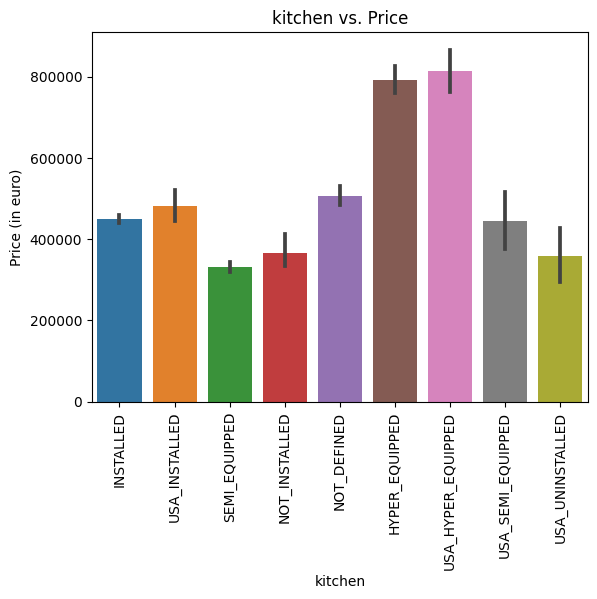

In [1128]:
create_cat_plot(df, 'kitchen', 90)

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'INSTALLED'),
  Text(1, 0, 'USA_INSTALLED'),
  Text(2, 0, 'SEMI_EQUIPPED'),
  Text(3, 0, 'NOT_INSTALLED'),
  Text(4, 0, 'NOT_DEFINED'),
  Text(5, 0, 'HYPER_EQUIPPED'),
  Text(6, 0, 'USA_HYPER_EQUIPPED'),
  Text(7, 0, 'USA_SEMI_EQUIPPED'),
  Text(8, 0, 'USA_UNINSTALLED')])

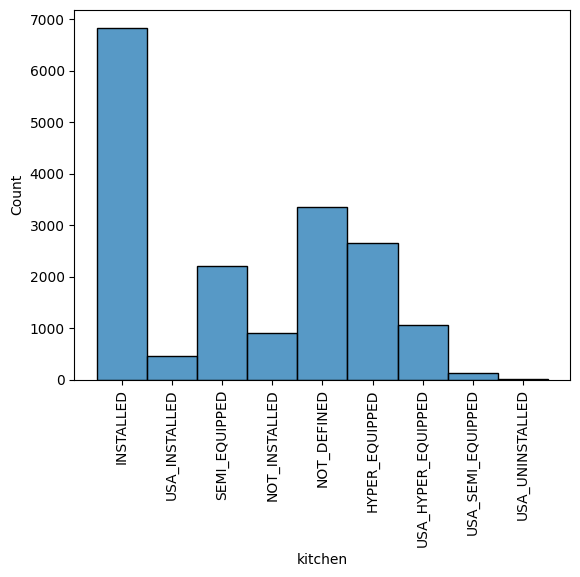

In [1129]:
sns.histplot(df, x='kitchen')
plt.xticks(rotation=90)

In [1130]:
df['kitchen'].describe()

count         17602
unique            9
top       INSTALLED
freq           6834
Name: kitchen, dtype: object

In [1131]:
df[df['kitchen'].isna()]

,locality,property_type,property_subtype,price,number_rooms,living_area,kitchen,furnished,fireplace,terrace,terrace_area,garden,garden_area,surface_land,number_facades,swimming_pool,building_state
31,Evergem,HOUSE,HOUSE,425000.0,3.0,171.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,826,NaN,False,TO_RENOVATE
32,Brakel,HOUSE,HOUSE,145000.0,3.0,122.000000,NaN,NaN,NaN,NaN,NaN,True,NaN,868,NaN,False,TO_RENOVATE
35,Pentagone (Bruxelles),HOUSE,APARTMENT_BLOCK,1290000.0,5.0,526.000000,NaN,False,NaN,True,16.0,NaN,NaN,105,3,False,NaN
36,Ursel,APARTMENT,APARTMENT,279900.0,2.0,105.000000,NaN,False,NaN,NaN,NaN,NaN,NaN,UNKNOWN,2,False,GOOD
43,Maldegem,HOUSE,HOUSE,270000.0,4.0,195.894535,NaN,NaN,NaN,NaN,NaN,NaN,NaN,755,NaN,False,TO_RENOVATE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19483,Ruiselede,HOUSE,VILLA,645000.0,5.0,320.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1228,NaN,False,NaN
19485,Dendermonde,APARTMENT,APARTMENT,195000.0,2.0,90.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
19490,Antwerp,HOUSE,HOUSE,389000.0,3.0,232.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74,NaN,False,TO_RENOVATE
19492,Gullegem,HOUSE,HOUSE,139000.0,3.0,126.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,154,2,NaN,TO_BE_DONE_UP


In [1132]:
df['kitchen'].replace(np.nan, 'NOT_DEFINED', inplace=True)

/tmp/ipykernel_35744/2147086355.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['kitchen'].replace(np.nan, 'NOT_DEFINED', inplace=True)


In [1133]:
df[df['kitchen'].isna()]

,locality,property_type,property_subtype,price,number_rooms,living_area,kitchen,furnished,fireplace,terrace,terrace_area,garden,garden_area,surface_land,number_facades,swimming_pool,building_state


([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'INSTALLED'),
  Text(1, 0, 'USA_INSTALLED'),
  Text(2, 0, 'SEMI_EQUIPPED'),
  Text(3, 0, 'NOT_INSTALLED'),
  Text(4, 0, 'NOT_DEFINED'),
  Text(5, 0, 'HYPER_EQUIPPED'),
  Text(6, 0, 'USA_HYPER_EQUIPPED'),
  Text(7, 0, 'USA_SEMI_EQUIPPED'),
  Text(8, 0, 'USA_UNINSTALLED')])

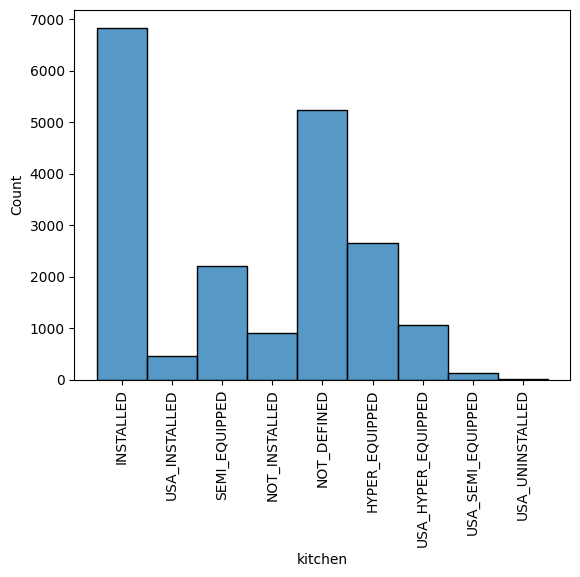

In [1134]:
sns.histplot(df, x='kitchen')
plt.xticks(rotation=90)

### 7. Furnished

In [1135]:
analyze_column(df, 'furnished')

Analysis for column 'furnished':
Number of NaN values: 9743
Number of unique values: 2
Percentage of NaN values: 49.97%
Percentage of unique values: 0.01%
Unique values: [nan True False]


In [1136]:
# A lot of NaN - can be assume that this NaN mean it is not furnished (I think so - especially Belgium not a lot of houses are sold furnished)
# replacing the NaN values with False
df['furnished'] = df['furnished'].replace(np.nan, False)

# replace the False values with 0 and the True values with 1
df['furnished'].replace(False, 0, inplace=True)
df['furnished'].replace(True, 1, inplace=True)

/tmp/ipykernel_35744/3612703356.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['furnished'] = df['furnished'].replace(np.nan, False)
/tmp/ipykernel_35744/3612703356.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['furnished'].replace(False, 0, inplace=True)
/tmp/ipykernel_35744/3612703356.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['furnished'].replace(T

In [1137]:
df[df['furnished'].isna()]

,locality,property_type,property_subtype,price,number_rooms,living_area,kitchen,furnished,fireplace,terrace,terrace_area,garden,garden_area,surface_land,number_facades,swimming_pool,building_state


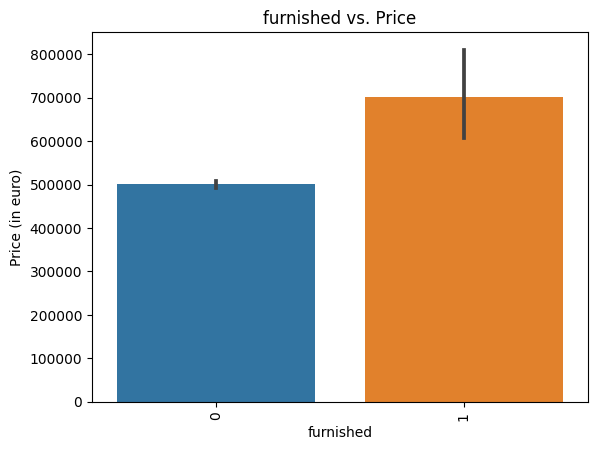

In [1138]:
create_cat_plot(df, 'furnished', 90)

In [1139]:
df['furnished'].unique()

array([0, 1])

### 8. Fireplace

In [1140]:
analyze_column(df, 'fireplace')

Analysis for column 'fireplace':
Number of NaN values: 13323
Number of unique values: 8
Percentage of NaN values: 68.33%
Percentage of unique values: 0.04%
Unique values: [-1. nan  1.  2.  3. 10.  6.  4.  5.]


In [1141]:
df['fireplace'].unique()

array([-1., nan,  1.,  2.,  3., 10.,  6.,  4.,  5.])

In [1142]:
# ASSUMPTION 1: -1 means there is no fireplace
df[df['fireplace'] == -1]

,locality,property_type,property_subtype,price,number_rooms,living_area,kitchen,furnished,fireplace,terrace,terrace_area,garden,garden_area,surface_land,number_facades,swimming_pool,building_state
0,Ham,HOUSE,VILLA,429500.0,4.0,215.0,INSTALLED,0,-1.0,NaN,NaN,True,NaN,1472,4,NaN,GOOD
1,Putte,HOUSE,HOUSE,599000.0,5.0,167.0,INSTALLED,0,-1.0,True,NaN,True,95.0,416,4,NaN,JUST_RENOVATED
2,IVOZ-RAMET,HOUSE,HOUSE,20000.0,3.0,130.0,INSTALLED,0,-1.0,True,NaN,NaN,NaN,182,3,NaN,GOOD
6,Charleroi,HOUSE,APARTMENT_BLOCK,120000.0,3.0,175.0,SEMI_EQUIPPED,0,-1.0,NaN,NaN,NaN,NaN,98,2,NaN,TO_RENOVATE
7,Marchin,HOUSE,HOUSE,129500.0,2.0,90.0,SEMI_EQUIPPED,0,-1.0,True,30.0,True,NaN,275,2,NaN,TO_BE_DONE_UP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19447,Herseaux,HOUSE,HOUSE,150000.0,2.0,89.0,SEMI_EQUIPPED,0,-1.0,True,15.0,True,40.0,111,2,NaN,TO_BE_DONE_UP
19453,MERBES-SAINTE-MARIE,HOUSE,HOUSE,160000.0,3.0,120.0,NOT_INSTALLED,0,-1.0,True,NaN,NaN,NaN,3609,4,NaN,TO_RENOVATE
19463,MESLIN-L'ÉVÊQUE,HOUSE,HOUSE,180000.0,3.0,180.0,NOT_INSTALLED,0,-1.0,NaN,NaN,NaN,NaN,710,NaN,NaN,TO_RENOVATE
19464,TAMINES,HOUSE,HOUSE,185000.0,3.0,127.0,SEMI_EQUIPPED,0,-1.0,True,17.0,True,58.0,245,2,NaN,GOOD


In [1143]:
# Replace the -1 values with 0
df['fireplace'].replace(-1, 0, inplace=True)

/tmp/ipykernel_35744/212737448.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fireplace'].replace(-1, 0, inplace=True)


In [1144]:
# ASSUMPTION 2 : -1 means there is no fireplace
# Replace the NaN values with 0
df['fireplace'].replace(np.nan, 0, inplace=True)

/tmp/ipykernel_35744/3882925043.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fireplace'].replace(np.nan, 0, inplace=True)


In [1145]:
df['fireplace'].unique()

array([ 0.,  1.,  2.,  3., 10.,  6.,  4.,  5.])

<Axes: xlabel='fireplace', ylabel='Count'>

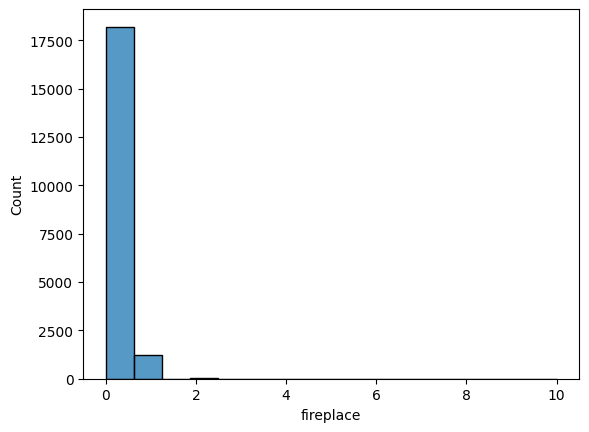

In [1146]:
sns.histplot(df, x='fireplace')

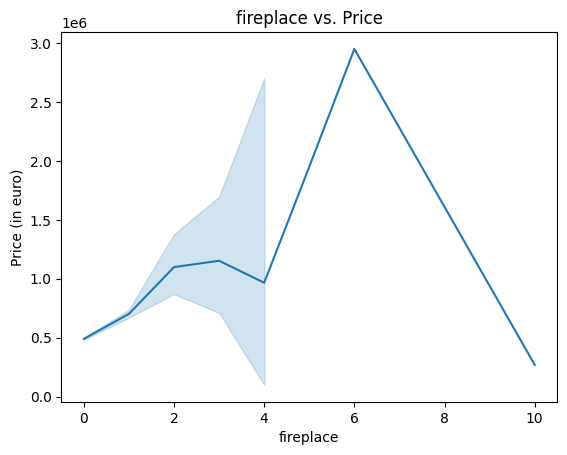

In [1147]:
create_num_plot(df, 'fireplace')

### 9. Terrace

In [1148]:
analyze_column(df, 'terrace')
# Assumption that NaN values are 0 and True values are 1

Analysis for column 'terrace':
Number of NaN values: 6612
Number of unique values: 1
Percentage of NaN values: 33.91%
Percentage of unique values: 0.01%
Unique values: [nan True]


In [1149]:
df.replace(np.nan, 0, inplace=True)
df.replace(True, 1, inplace=True)

/tmp/ipykernel_35744/3758305244.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace(np.nan, 0, inplace=True)
/tmp/ipykernel_35744/3758305244.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace(True, 1, inplace=True)


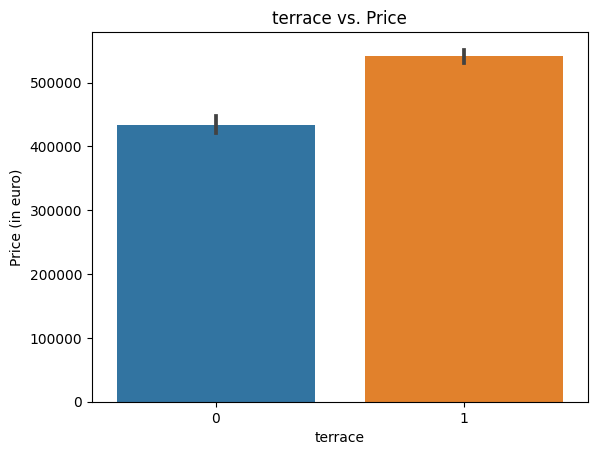

In [1150]:
create_cat_plot(df, 'terrace', 0)

### 10. Terrace Area

In [1151]:
analyze_column(df, 'terrace_area')

Analysis for column 'terrace_area':
Number of NaN values: 0
Number of unique values: 175
Percentage of NaN values: 0.00%
Percentage of unique values: 0.90%
Unique values: [0.00e+00 1.20e+01 4.50e+01 3.00e+01 2.00e+01 9.00e+00 2.80e+01 3.20e+01
 8.10e+01 1.00e+01 3.50e+01 6.50e+01 1.60e+01 1.80e+01 1.00e+00 1.50e+01
 2.60e+01 2.70e+01 3.10e+01 2.50e+01 8.50e+01 6.00e+01 2.40e+01 4.00e+00
 7.00e+00 4.00e+01 6.00e+00 4.10e+01 4.40e+01 3.70e+01 5.00e+01 8.00e+02
 1.40e+01 2.20e+01 2.10e+01 6.80e+01 1.60e+02 8.60e+01 5.00e+00 8.00e+00
 4.60e+01 3.40e+01 8.00e+01 5.90e+01 1.40e+02 6.40e+01 4.80e+01 1.02e+02
 1.90e+01 1.20e+02 1.00e+02 1.30e+01 4.90e+01 1.50e+02 2.00e+00 3.80e+01
 3.30e+01 3.96e+02 9.60e+01 4.20e+01 9.20e+01 6.60e+01 6.10e+01 1.10e+01
 1.95e+02 3.00e+00 3.26e+02 1.70e+01 8.90e+01 7.00e+01 1.04e+02 6.20e+01
 2.90e+01 4.95e+02 1.23e+02 5.50e+01 1.11e+02 5.70e+01 4.30e+01 9.00e+01
 1.47e+02 2.30e+01 3.00e+02 3.60e+01 5.60e+01 5.40e+01 5.30e+01 7.20e+01
 2.36e+02 1.10e+02 1.08e+0

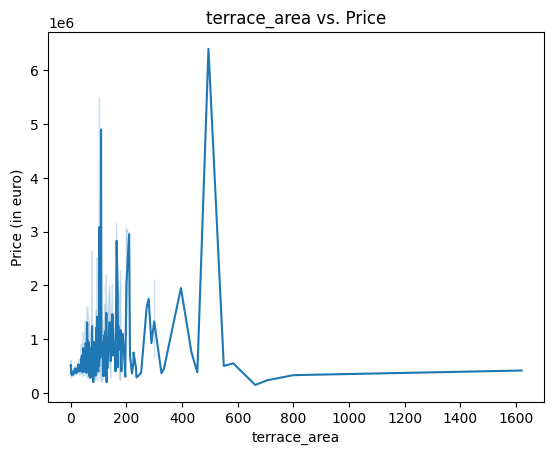

In [1152]:
create_num_plot(df, 'terrace_area')

In [1153]:
df.groupby('terrace')['terrace_area'].mean()

terrace
0     0.000000
1    18.007682
Name: terrace_area, dtype: float64

In [1154]:
df[df['terrace_area'] == 0.0]

,locality,property_type,property_subtype,price,number_rooms,living_area,kitchen,furnished,fireplace,terrace,terrace_area,garden,garden_area,surface_land,number_facades,swimming_pool,building_state
0,Ham,HOUSE,VILLA,429500.0,4.0,215.000000,INSTALLED,0,0.0,0,0.0,1,0.0,1472,4,0,GOOD
1,Putte,HOUSE,HOUSE,599000.0,5.0,167.000000,INSTALLED,0,0.0,1,0.0,1,95.0,416,4,0,JUST_RENOVATED
2,IVOZ-RAMET,HOUSE,HOUSE,20000.0,3.0,130.000000,INSTALLED,0,0.0,1,0.0,0,0.0,182,3,0,GOOD
4,Liege,HOUSE,HOUSE,109000.0,2.0,62.000000,SEMI_EQUIPPED,0,0.0,0,0.0,0,0.0,45,2,False,TO_BE_DONE_UP
6,Charleroi,HOUSE,APARTMENT_BLOCK,120000.0,3.0,175.000000,SEMI_EQUIPPED,0,0.0,0,0.0,0,0.0,98,2,0,TO_RENOVATE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19493,Molenbeek-Saint-Jean,HOUSE,EXCEPTIONAL_PROPERTY,369000.0,5.0,389.741742,INSTALLED,0,0.0,0,0.0,0,0.0,0,2,False,GOOD
19494,Brecht,HOUSE,HOUSE,375000.0,3.0,195.894535,INSTALLED,0,0.0,0,0.0,1,245.0,712,4,False,GOOD
19495,Hasselt,APARTMENT,APARTMENT,1295000.0,3.0,191.000000,NOT_DEFINED,0,0.0,0,0.0,0,0.0,UNKNOWN,0,0,GOOD
19497,Affligem,HOUSE,HOUSE,485000.0,4.0,265.000000,NOT_DEFINED,0,0.0,0,0.0,0,0.0,228,3,False,GOOD


In [1155]:
df_terr = df[df['terrace'] == 1]
df_terr = df_terr[df['terrace_area'] == 0.0]
df_terr

/tmp/ipykernel_35744/3835267840.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_terr = df_terr[df['terrace_area'] == 0.0]


,locality,property_type,property_subtype,price,number_rooms,living_area,kitchen,furnished,fireplace,terrace,terrace_area,garden,garden_area,surface_land,number_facades,swimming_pool,building_state
1,Putte,HOUSE,HOUSE,599000.0,5.0,167.0,INSTALLED,0,0.0,1,0.0,1,95.0,416,4,0,JUST_RENOVATED
2,IVOZ-RAMET,HOUSE,HOUSE,20000.0,3.0,130.0,INSTALLED,0,0.0,1,0.0,0,0.0,182,3,0,GOOD
17,Huy,HOUSE,HOUSE,189500.0,4.0,110.0,SEMI_EQUIPPED,0,0.0,1,0.0,0,0.0,185,3,0,GOOD
23,Amay,HOUSE,HOUSE,219500.0,1.0,160.0,INSTALLED,0,0.0,1,0.0,1,0.0,112,2,0,GOOD
30,pilar de la horadada,APARTMENT,APARTMENT,295000.0,3.0,94.0,NOT_DEFINED,0,0.0,1,0.0,0,0.0,UNKNOWN,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19456,Tienen,HOUSE,HOUSE,169000.0,2.0,156.0,INSTALLED,0,0.0,1,0.0,1,140.0,230,2,False,TO_BE_DONE_UP
19469,Merelbeke,HOUSE,HOUSE,549000.0,3.0,156.0,NOT_DEFINED,0,0.0,1,0.0,1,0.0,222,0,False,0
19470,Merelbeke,HOUSE,HOUSE,549000.0,3.0,213.0,NOT_DEFINED,0,0.0,1,0.0,1,0.0,223,0,False,0
19471,Merelbeke,HOUSE,HOUSE,559000.0,3.0,213.0,NOT_DEFINED,0,0.0,1,0.0,1,0.0,280,UNKNOWN,False,UNKNOWN


### 11. Garden

In [1156]:
analyze_column(df, 'garden')

Analysis for column 'garden':
Number of NaN values: 0
Number of unique values: 2
Percentage of NaN values: 0.00%
Percentage of unique values: 0.01%
Unique values: [1 0]


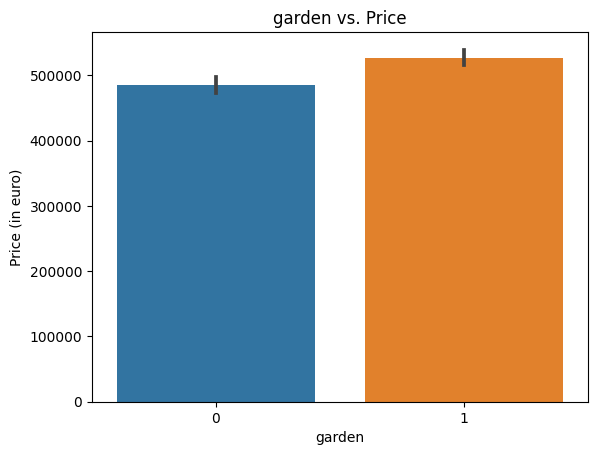

In [1157]:
create_cat_plot(df, 'garden', 0)

### 12. Garden Area

In [1158]:
analyze_column(df, 'garden_area')

Analysis for column 'garden_area':
Number of NaN values: 0
Number of unique values: 1099
Percentage of NaN values: 0.00%
Percentage of unique values: 5.64%
Unique values: [   0.   95.   80. ... 1458.  534.  432.]


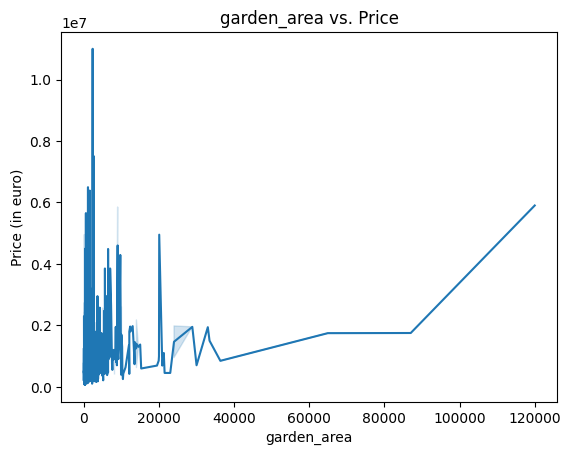

In [1159]:
create_num_plot(df, 'garden_area')

### 13. Surface of the Land

In [1160]:
analyze_column(df, 'surface_land')

Analysis for column 'surface_land':
Number of NaN values: 0
Number of unique values: 2677
Percentage of NaN values: 0.00%
Percentage of unique values: 13.73%
Unique values: ['1472' '416' '182' ... '2377' '3609' '1033']


In [1161]:
df['surface_land'].replace('UNKNOWN', np.nan, inplace=True)

/tmp/ipykernel_35744/2155599461.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['surface_land'].replace('UNKNOWN', np.nan, inplace=True)


In [1162]:
analyze_column(df, 'surface_land')

Analysis for column 'surface_land':
Number of NaN values: 1895
Number of unique values: 2676
Percentage of NaN values: 9.72%
Percentage of unique values: 13.72%
Unique values: ['1472' '416' '182' ... '2377' '3609' '1033']


In [1163]:
# change the 'UNKNOWN' to the mean_value of surface_land grouped by property_subtype
# TODO!

### 14. Number of Facades

In [1164]:
analyze_column(df, 'number_facades')

Analysis for column 'number_facades':
Number of NaN values: 0
Number of unique values: 10
Percentage of NaN values: 0.00%
Percentage of unique values: 0.05%
Unique values: ['4' '3' '2' 0 'UNKNOWN' '1' '6' '26' '5' '14']


In [1165]:
df['number_facades'].replace('UNKNOWN', -1, inplace=True)

/tmp/ipykernel_35744/1933703081.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['number_facades'].replace('UNKNOWN', -1, inplace=True)


In [1166]:
df[df['number_facades'].isnull()]

,locality,property_type,property_subtype,price,number_rooms,living_area,kitchen,furnished,fireplace,terrace,terrace_area,garden,garden_area,surface_land,number_facades,swimming_pool,building_state


In [1167]:
df['number_facades'] = df['number_facades'].astype(int)

/tmp/ipykernel_35744/784660092.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['number_facades'] = df['number_facades'].astype(int)


In [1168]:
# check if any strings in the column
unique_values = df['number_facades'].unique()
string_values = [value for value in unique_values if isinstance(value, str)]

In [1169]:
df['number_facades'].replace(-1, np.nan, inplace=True)

mean_facades = df.groupby('property_subtype')['number_facades'].transform('mean')
filled_facades = df.groupby('property_subtype')['number_facades'].fillna(round(mean_facades))
df['number_facades'] = filled_facades

/tmp/ipykernel_35744/4001821053.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['number_facades'].replace(-1, np.nan, inplace=True)
/tmp/ipykernel_35744/4001821053.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['number_facades'] = filled_facades


In [1170]:
df['number_facades'].unique()

array([ 4.,  3.,  2.,  0.,  1.,  6., 26.,  5., 14.])

<Axes: xlabel='number_facades', ylabel='price'>

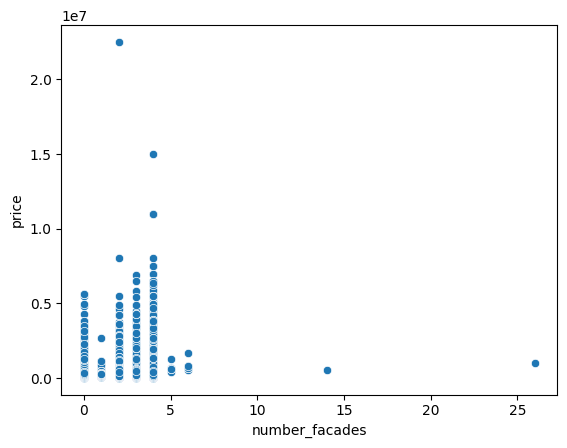

In [1171]:
sns.scatterplot(df, x='number_facades', y='price')

### 15. Swimming Pool

In [1172]:
analyze_column(df, 'swimming_pool')

Analysis for column 'swimming_pool':
Number of NaN values: 0
Number of unique values: 2
Percentage of NaN values: 0.00%
Percentage of unique values: 0.01%
Unique values: [0 1]


In [1178]:
# change False and True to 0 and 1
df['swimming_pool'].replace(False, 0, inplace=True)
df['swimming_pool'].replace(True, 1, inplace=True)

/tmp/ipykernel_35744/2644011061.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['swimming_pool'].replace(False, 0, inplace=True)
/tmp/ipykernel_35744/2644011061.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['swimming_pool'].replace(True, 1, inplace=True)


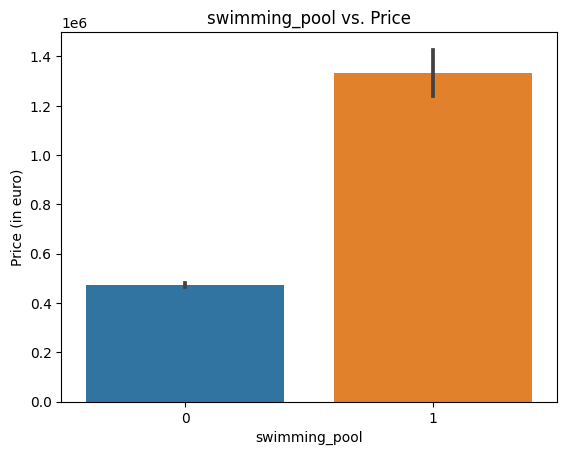

In [1180]:
create_cat_plot(df, 'swimming_pool', 0)

In [1181]:
df['swimming_pool'].unique()

array([0, 1])

### 16. Building State

In [1175]:
analyze_column(df, 'building_state')

Analysis for column 'building_state':
Number of NaN values: 0
Number of unique values: 8
Percentage of NaN values: 0.00%
Percentage of unique values: 0.04%
Unique values: ['GOOD' 'JUST_RENOVATED' 'TO_BE_DONE_UP' 'TO_RENOVATE' 'AS_NEW' 0
 'UNKNOWN' 'TO_RESTORE']


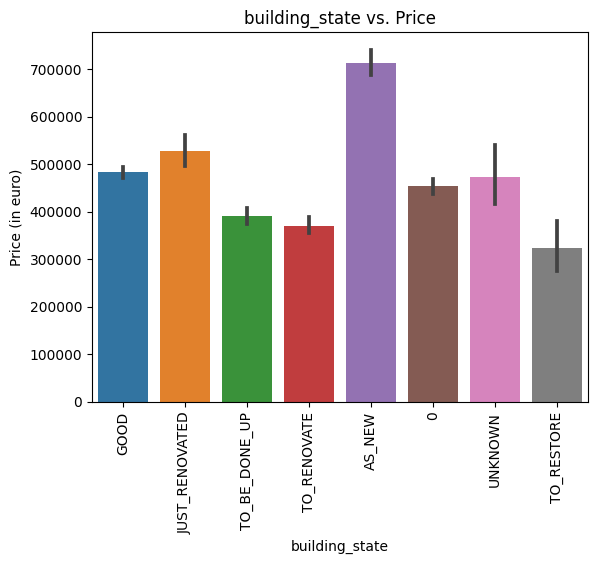

In [1176]:
create_cat_plot(df, 'building_state', 90)

In [1184]:
df[df['building_state'] == 'UNKNOWN']

,locality,property_type,property_subtype,price,number_rooms,living_area,kitchen,furnished,fireplace,terrace,terrace_area,garden,garden_area,surface_land,number_facades,swimming_pool,building_state
91,Brugge,APARTMENT,APARTMENT,273900.0,2.0,99.713227,NOT_DEFINED,0,0.0,1,0.0,0,0.0,NaN,1.0,0,UNKNOWN
96,Namur,APARTMENT,FLAT_STUDIO,85000.0,0.0,22.000000,SEMI_EQUIPPED,0,0.0,0,0.0,0,0.0,NaN,1.0,0,UNKNOWN
148,Hasselt,HOUSE,EXCEPTIONAL_PROPERTY,524900.0,3.0,281.000000,INSTALLED,0,0.0,1,0.0,0,0.0,220,3.0,0,UNKNOWN
154,Vurste,HOUSE,HOUSE,445000.0,5.0,185.000000,NOT_DEFINED,0,0.0,0,0.0,1,0.0,235,2.0,0,UNKNOWN
155,Vurste,HOUSE,HOUSE,375000.0,5.0,185.000000,NOT_DEFINED,0,0.0,1,0.0,0,0.0,235,2.0,0,UNKNOWN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19248,Lede,APARTMENT,APARTMENT,225000.0,2.0,90.000000,NOT_DEFINED,0,0.0,1,0.0,0,0.0,NaN,1.0,0,UNKNOWN
19287,Liège,HOUSE,HOUSE,445000.0,6.0,300.000000,NOT_INSTALLED,0,0.0,0,0.0,0,0.0,0,2.0,0,UNKNOWN
19425,Mouscron,HOUSE,HOUSE,149000.0,2.0,107.000000,NOT_DEFINED,0,0.0,0,0.0,0,0.0,0,2.0,0,UNKNOWN
19471,Merelbeke,HOUSE,HOUSE,559000.0,3.0,213.000000,NOT_DEFINED,0,0.0,1,0.0,1,0.0,280,2.0,0,UNKNOWN


In [1185]:
df['building_state'].replace(0, 'UNKNOWN', inplace=True)

/tmp/ipykernel_35744/2321911779.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['building_state'].replace(0, 'UNKNOWN', inplace=True)


In [1188]:
df['building_state'].unique()

array(['GOOD', 'JUST_RENOVATED', 'TO_BE_DONE_UP', 'TO_RENOVATE', 'AS_NEW',
       'UNKNOWN', 'TO_RESTORE'], dtype=object)

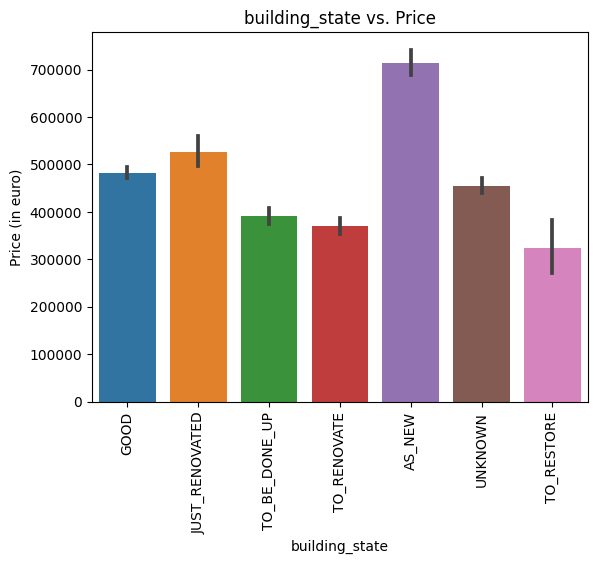

In [1189]:
create_cat_plot(df, 'building_state', 90)